# Music recommender system

One of the most used machine learning algorithms is recommendation systems. A **recommender** (or recommendation) **system** (or engine) is a filtering system which aim is to predict a rating or preference a user would give to an item, eg. a film, a product, a song, etc.

Which type of recommender can we have?   

There are two main types of recommender systems: 
- Content-based filters
- Collaborative filters
  
> Content-based filters predicts what a user likes based on what that particular user has liked in the past. On the other hand, collaborative-based filters predict what a user like based on what other users, that are similar to that particular user, have liked.

We have previously developed a content-based recommendation system. Now, we'll look into collaborative filtering. 

### 2) Collaborative filters

Collaborative Filters work with an interaction matrix, also called rating matrix. The aim of this algorithm is to learn a function that can predict if a user will benefit from an item - meaning the user will likely buy, listen to, watch this item.

Among collaborative-based systems, we can encounter two types: **user-item** filtering and **item-item** filtering. 

*What algorithms do collaborative filters use to recommend new songs?* There are several machine learning algorithms that can be used in the case of collaborative filtering. Among them, we can mention nearest-neighbor, clustering, and matrix factorization.

**K-Nearest Neighbors (kNN)** is considered the standard method when it comes to both user-based and item-based collaborative filtering approaches.
  
We'll go through the steps for generating a music recommender system using a k-nearest algorithm approach.

### Importing required libraries

First, we'll import all the required libraries.

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Tushar Biswas\AppData\Local\Temp\ipykernel_25268\555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
from scipy.sparse import csr_matrix

In [4]:
from recommeders.knn_recommender import Recommender

C:\Users\Tushar Biswas\AppData\Roaming\Python\Python311\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


### Reading the files

We are going to use the **[Million Song Dataset](http://millionsongdataset.com/)**, a freely-available collection of audio features and metadata for a million contemporary popular music tracks. 

There are two files that will be interesting for us. The first of them will give us information about the songs. Particularly, it contains the user ID, song ID and the listen count. On the other hand, the second file will contain song ID, title of that song, release, artist name and year. 
We need to merge these two DataFrames. For that aim, we'll use the `song_ID` 

In [5]:
#Read userid-songid-listen_count
song_info = pd.read_csv(r"C:\Users\Tushar Biswas\Downloads\triplets_file\triplets_file.csv")
song_info.columns = ['user_id', 'song_id', 'listen_count']

#Read song  metadata
song_actual =  pd.read_csv(r"C:\Users\Tushar Biswas\Downloads\Song_Recommender_System-master\Song_Recommender_System-master\song_data.csv")
song_actual.drop_duplicates(['song_id'], inplace=True)

#Merge the two dataframes above to create input dataframe for recommender systems
songs = pd.merge(song_info, song_actual, on="song_id", how="left")

In [6]:
songs.head()

user_id             song_id  listen_count  \
0  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOAKIMP12A8C130995             1   
1  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBBMDR12A8C13253B             2   
2  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBXHDL12A81C204C0             1   
3  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SOBYHAJ12A6701BF1D             1   
4  b80344d063b5ccb3212f76538f3d9e43d87dca9e  SODACBL12A8C13C273             1   

             title                        release    artist_name  year  
0         The Cove             Thicker Than Water   Jack Johnson     0  
1  Entre Dos Aguas            Flamenco Para Niños  Paco De Lucia  1976  
2         Stronger                     Graduation     Kanye West  2007  
3   Constellations              In Between Dreams   Jack Johnson  2005  
4     Learn To Fly  There Is Nothing Left To Lose   Foo Fighters  1999

We'll save this dataset into a `csv file` so we have this available if there is any other recommendation system project we want to do.

In [7]:
songs.to_csv('songs.csv', index=False)

We can read this file into a new **DataFrame** that we'd call `df_songs`.

In [8]:
df_songs = pd.read_csv('songs.csv')

## Exploring the data


As usual, any data science or machine learning project starts with an exploratory data analysis (EDA). The aim of EDA is to understand and get insights on our data.

We'll first inspect the first rows of our `DataFrame`.

In [9]:
df_songs.tail(10)

user_id             song_id  \
1999990  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOHTZUF12A8C13582B   
1999991  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOHZPIK12A58A7CCAE   
1999992  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOIDDNJ12AC9071B90   
1999993  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOINKEZ12A6310E1FC   
1999994  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOIOESO12A6D4F621D   
1999995  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJEYPO12AAA8C6B0E   
1999996  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJJYDE12AF729FC16   
1999997  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJKQSF12A6D4F5EE9   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   
1999999  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJYOLS12A8C13C06F   

         listen_count                           title  \
1999990             2                  Pork And Beans   
1999991             4                          Te Amo   
1999992             1               That Should Be Me   
1999993             2                            Work   
1999994             4          Unwell (Album Version)   
1999995             2       Ignorance (Album Version)   
1999996             4          Two Is Better Than One   
1999997             3  What I've Done (Album Version)   
1999998             1                              Up   
1999999             1      Soil_ Soil (Album Version)   

                             release                             artist_name  \
1999990               Pork And Beans                                  Weezer   
1999991                      Rated R                                 Rihanna   
1999992                    My Worlds                           Justin Bieber   
1999993                         Work                         Jimmy Eat World   
1999994  More Than You Think You Are                         matchbox twenty   
1999995                    Ignorance                                Paramore   
1999996                   Love Drunk  Boys Like Girls featuring Taylor Swift   
1999997               What I've Done                             Linkin Park   
1999998                    My Worlds                           Justin Bieber   
1999999                      The Con                          Tegan And Sara   

         year  
1999990  2008  
1999991  2009  
1999992  2010  
1999993  2004  
1999994  2003  
1999995     0  
1999996  2009  
1999997  2007  
1999998  2010  
1999999  2007

In [10]:
df_songs[(df_songs['artist_name'] == 'Justin Bieber')]

user_id             song_id  \
75       4bd88bfb25263a75bbdd467e74018f4ae570e5df  SODGVGW12AC9075A8D   
179      b64cdd1a0bd907e5e00b39e345194768e330d652  SOUGCDK12AC95F075F   
918      bd8475385f0aa78830fa6dfce9e7242164b035c8  SODGVGW12AC9075A8D   
1198     a58de017cbeda1763ea002fe027ed41b4ed53109  SODGVGW12AC9075A8D   
1202     a58de017cbeda1763ea002fe027ed41b4ed53109  SODOWUC12AC9097E76   
...                                           ...                 ...   
1999684  9fb0717a34c90c91ce09ab460969a8a428d3ac87  SOUGCDK12AC95F075F   
1999961  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SODGVGW12AC9075A8D   
1999966  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SODOWUC12AC9097E76   
1999992  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOIDDNJ12AC9071B90   
1999998  d8bfd4ec88f0f3773a9e022e3c1a0f1d3b7b6a92  SOJUXGA12AC961885C   

         listen_count              title    release    artist_name  year  
75                  6   Somebody To Love  My Worlds  Justin Bieber  2010  
179                 1   Never Let You Go  My Worlds  Justin Bieber  2010  
918                 5   Somebody To Love  My Worlds  Justin Bieber  2010  
1198                4   Somebody To Love  My Worlds  Justin Bieber  2010  
1202                3           One Time   One Time  Justin Bieber  2009  
...               ...                ...        ...            ...   ...  
1999684             1   Never Let You Go  My Worlds  Justin Bieber  2010  
1999961             5   Somebody To Love  My Worlds  Justin Bieber  2010  
1999966             1           One Time   One Time  Justin Bieber  2009  
1999992             1  That Should Be Me  My Worlds  Justin Bieber  2010  
1999998             1                 Up  My Worlds  Justin Bieber  2010  

[13959 rows x 7 columns]

Then, we'll check how many observions there are in the dataset.

In [11]:
#Get total observations
print(f"There are {df_songs.shape[0]} observations in the dataset")

There are 2000000 observations in the dataset


Now, we should perform some cleaning steps. But looking at the dataset, we can see that there is no missing values.

In [12]:
df_songs.isnull().sum()

user_id         0
song_id         0
listen_count    0
title           0
release         0
artist_name     0
year            0
dtype: int64


And most of the columns contain strings.

In [13]:
df_songs.dtypes

user_id         object
song_id         object
listen_count     int64
title           object
release         object
artist_name     object
year             int64
dtype: object

Let's start exploring some characteristics of the dataset: 

- Unique songs:

In [14]:
#Unique songs
unique_songs = df_songs['title'].unique().shape[0]
print(f"There are {unique_songs} unique songs in the dataset")

There are 9567 unique songs in the dataset


- Unique artists:

In [15]:
#Unique artists
unique_artists = df_songs['artist_name'].unique().shape[0]
print(f"There are {unique_artists} unique artists in the dataset")

There are 3375 unique artists in the dataset


- Unique users:

In [16]:
#Unique users
unique_users = df_songs['user_id'].unique().shape[0]
print(f"There are {unique_users} unique users in the dataset")

There are 76353 unique users in the dataset


We'll go ahead and explore the popularity of songs and artists.

### Most popular songs

How do we determine which are the most popular songs? For this task, we'll count how many times each song appears. Note that while we are using  `listen_count`, we only care about the number of rows, we don't consider the number present in that row. This number represents how many times one user listen to the same song.

In [17]:
#count how many rows we have by song, we show only the ten more popular songs 
ten_pop_songs = df_songs.groupby('title')['listen_count'].count().reset_index().sort_values(['listen_count', 'title'], ascending = [0,1])
ten_pop_songs['percentage']  = round(ten_pop_songs['listen_count'].div(ten_pop_songs['listen_count'].sum())*100, 2)

In [18]:
ten_pop_songs = ten_pop_songs[:10]
ten_pop_songs

title  listen_count  \
6836                                      Sehr kosmisch          8277   
8725                                               Undo          7032   
1964                     Dog Days Are Over (Radio Edit)          6949   
9496                                     You're The One          6729   
6498                                            Revelry          6145   
6825                                            Secrets          5841   
3437  Horn Concerto No. 4 in E flat K495: II. Romanc...          5385   
2595                                          Fireflies          4795   
3322                                   Hey_ Soul Sister          4758   
8494                                           Tive Sim          4548   

      percentage  
6836        0.41  
8725        0.35  
1964        0.35  
9496        0.34  
6498        0.31  
6825        0.29  
3437        0.27  
2595        0.24  
3322        0.24  
8494        0.23

In [19]:
labels = ten_pop_songs['title'].tolist()
counts = ten_pop_songs['listen_count'].tolist()

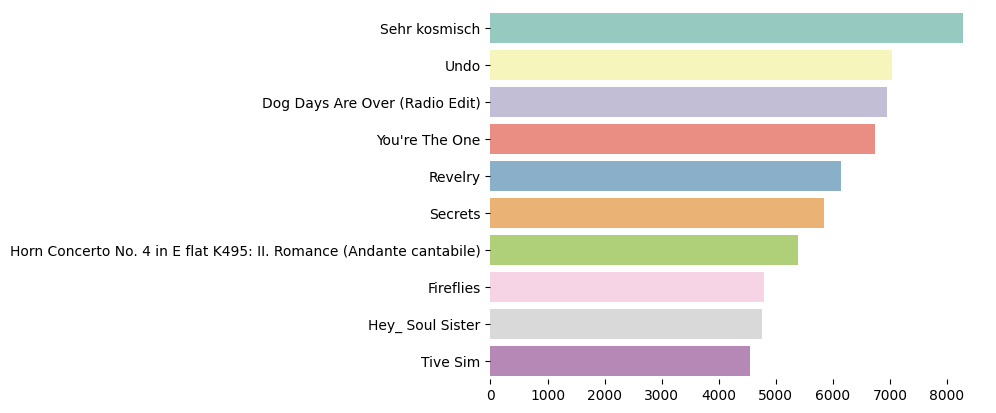

In [20]:
plt.figure()
sns.barplot(x=counts, y=labels, palette='Set3')
sns.despine(left=True, bottom=True)

### Most popular artist

For the next task, we'll count how many times each artist appears. Again, we'll count how many times the same artist appears.

In [21]:
#count how many rows we have by artist name, we show only the ten more popular artist 
ten_pop_artists  = df_songs.groupby(['artist_name'])['listen_count'].count().reset_index().sort_values(['listen_count', 'artist_name'], 
                                                                                                ascending = [0,1])

In [22]:
ten_pop_artists = ten_pop_artists[:10]
ten_pop_artists

artist_name  listen_count
649                 Coldplay         29422
2850          The Black Keys         19862
1651           Kings Of Leon         18747
1107  Florence + The Machine         18112
1370            Jack Johnson         17801
2946             The Killers         16063
2374               Radiohead         14890
736                Daft Punk         14715
2073                    Muse         14005
1554           Justin Bieber         13959

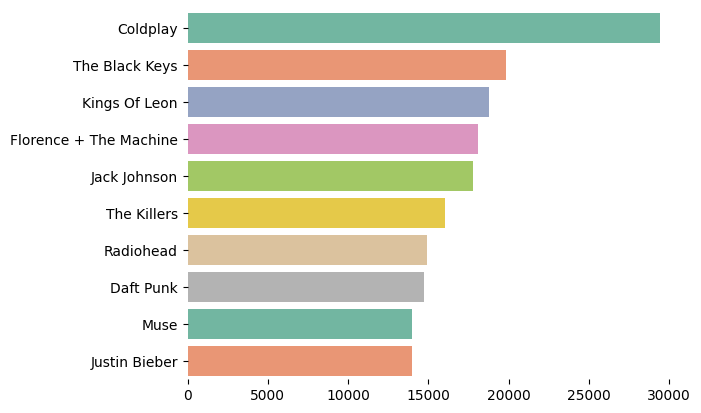

In [23]:
plt.figure()
labels = ten_pop_artists['artist_name'].tolist()
counts = ten_pop_artists['listen_count'].tolist()
sns.barplot(x=counts, y=labels, palette='Set2')
sns.despine(left=True, bottom=True)

### Listen count by user

We can also get some other information from the feature `listen_count`. We will answer the folloging questions:

**What was the maximum time the same user listen to a same song?**

In [24]:
listen_counts = pd.DataFrame(df_songs.groupby('listen_count').size(), columns=['count'])


In [25]:

listen_counts

count
listen_count         
1             1138433
2              313043
3              142933
4               82569
5               93136
...               ...
683                 1
796                 1
879                 1
920                 1
2213                1

[295 rows x 1 columns]

In [26]:
print(f"The maximum time the same user listened to the same songs was: {listen_counts.reset_index(drop=False)['listen_count'].iloc[-1]}")

The maximum time the same user listened to the same songs was: 2213


**How many times on average the same user listen to a same song?**

In [27]:
print(f"On average, a user listen to the same song {df_songs['listen_count'].mean()} times")

On average, a user listen to the same song 3.0454845 times


We can also check the distribution of `listen_count`:

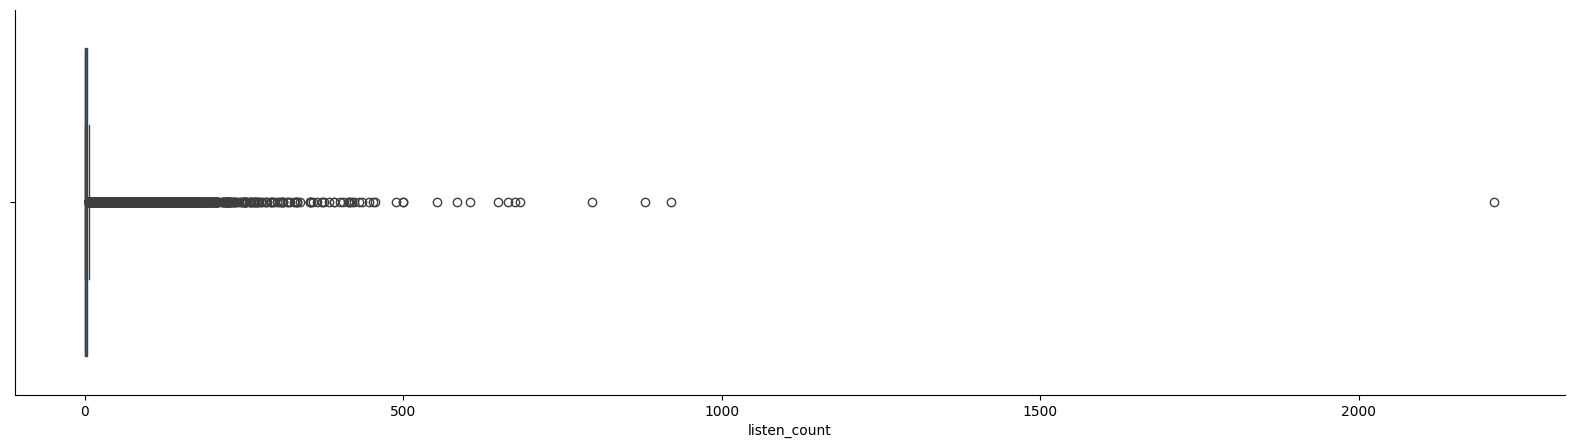

In [28]:
plt.figure(figsize=(20, 5))
sns.boxplot(x='listen_count', data=df_songs)
sns.despine()

**What are the most frequent number of times a user listen to the same song?**

In [29]:
listen_counts_temp = listen_counts[listen_counts['count'] > 50].reset_index(drop=False)

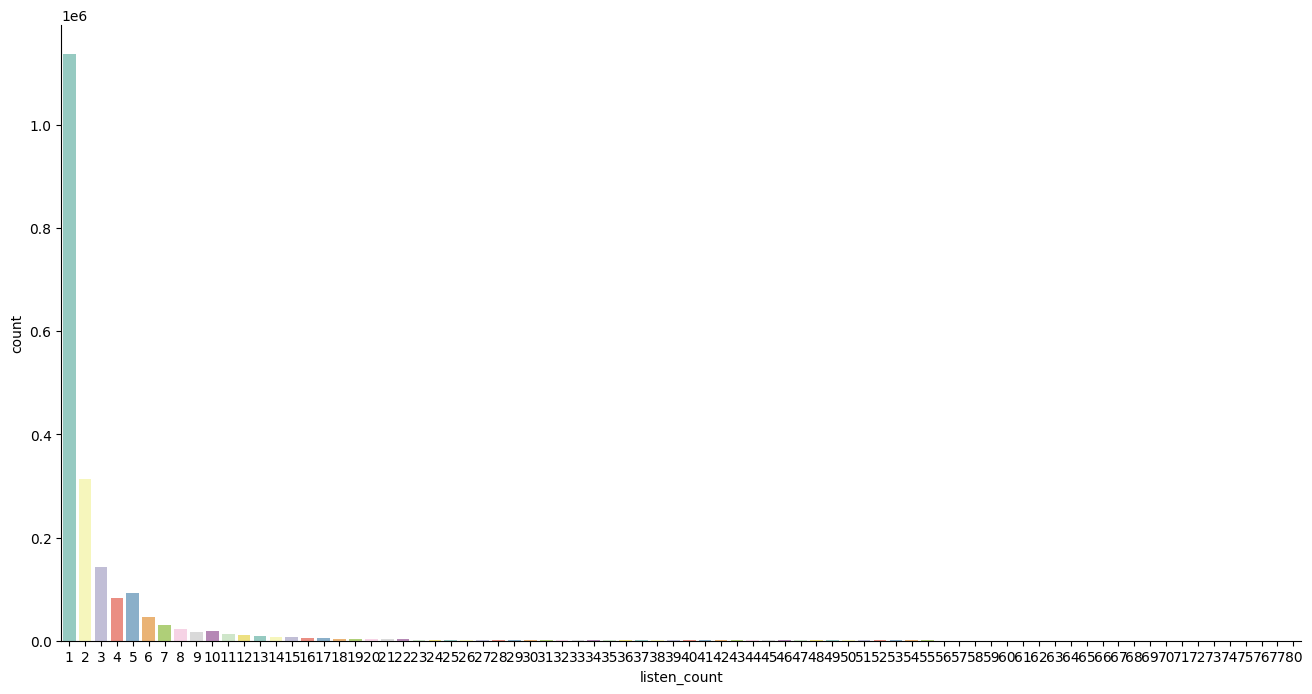

In [30]:
plt.figure(figsize=(16, 8))
sns.barplot(x='listen_count', y='count', palette='Set3', data=listen_counts_temp)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

**How many songs does a user listen in average?**

In [31]:
song_user = df_songs.groupby('user_id')['song_id'].count()

C:\Users\Tushar Biswas\AppData\Local\Temp\ipykernel_25268\3389125263.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(song_user.values, color='orange')


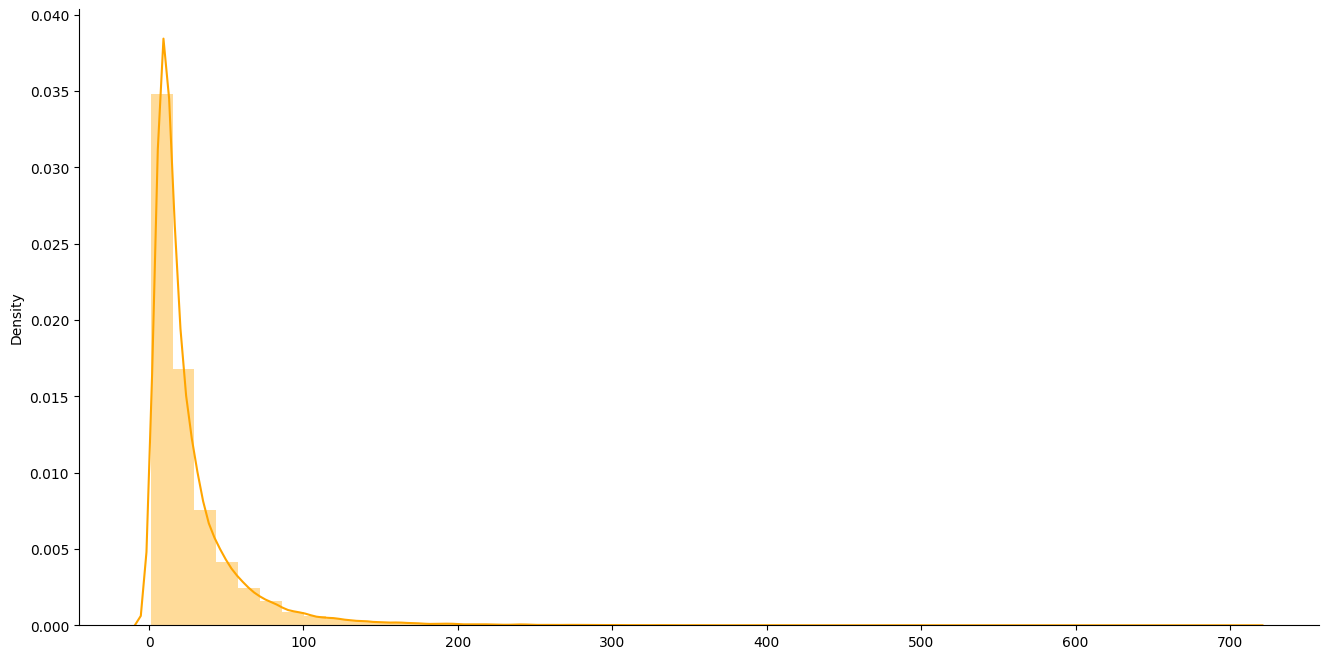

In [32]:
plt.figure(figsize=(16, 8))
sns.distplot(song_user.values, color='orange')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.show()

In [33]:
print(f"A user listens to an average of {np.mean(song_user)} songs")

A user listens to an average of 26.194124657839247 songs


In [34]:
print(f"A user listens to an average of {np.median(song_user)} songs, with minimum {np.min(song_user)} and maximum {np.max(song_user)} songs")

A user listens to an average of 16.0 songs, with minimum 1 and maximum 711 songs


We can see that a user listens in average to 27 songs. Even the maximum amount of songs listen by an user is 711, and we have 9567 songs in our dataset.

So, not all user listen to all songs, so a lot of values in the `song x users` matrix are going to be zero. Thus, we’ll be dealing with extremely sparse data. 

*How sparse?* Let's check that:

In [35]:
# Get how many values should it be if all songs have been listen by all users
values_matrix = unique_users * unique_songs

In [36]:
# Substract the total values with the actural shape of the DataFrame songs
zero_values_matrix = values_matrix - df_songs.shape[0]

In [37]:
print(f"The matrix of users x songs has {zero_values_matrix} values that are zero")

The matrix of users x songs has 728469151 values that are zero


Dealing with such a sparse matrix, we'll take a lot of memory and resources. To make our life easier, let's just select all those users that have listened to at least 16 songs. 

### Prepare the data

In [38]:
# Get users which have listen to at least 16 songs
song_ten_id = song_user[song_user > 16].index.to_list()


In [39]:
# Filtered the dataset to keep only those users with more than 16 listened
df_song_id_more_ten = df_songs[df_songs['user_id'].isin(song_ten_id)].reset_index(drop=True)

We need now to work with a `scipy-sparse matrix` to avoid overflow and wasted memory. For that purpose, we'll use the `csr_matrix` function from `scipy.sparse`.

In [40]:
# convert the dataframe into a pivot table
df_songs_features = df_song_id_more_ten.pivot(index='song_id', columns='user_id', values='listen_count').fillna(0)

# obtain a sparse matrix
mat_songs_features = csr_matrix(df_songs_features.values)

In [41]:
df_songs_features

user_id             000e2c2a8c7870ff9121f212b35c8b3a20cc0e67  \
song_id                                                        
SOAAAGQ12A8C1420C8                                       0.0   
SOAACPJ12A81C21360                                       0.0   
SOAACSG12AB018DC80                                       0.0   
SOAAEJI12AB0188AB5                                       0.0   
SOAAFAC12A67ADF7EB                                       0.0   
...                                                      ...   
SOZZTNF12A8C139916                                       0.0   
SOZZVWB12AB0189C30                                       0.0   
SOZZWZV12A67AE140F                                       0.0   
SOZZYAO12A6701FF36                                       0.0   
SOZZZPV12A8C1444B5                                       0.0   

user_id             000ebc858861aca26bac9b49f650ed424cf882fc  \
song_id                                                        
SOAAAGQ12A8C1420C8                                       0.0   
SOAACPJ12A81C21360                                       0.0   
SOAACSG12AB018DC80                                       0.0   
SOAAEJI12AB0188AB5                                       0.0   
SOAAFAC12A67ADF7EB                                       0.0   
...                                                      ...   
SOZZTNF12A8C139916                                       0.0   
SOZZVWB12AB0189C30                                       0.0   
SOZZWZV12A67AE140F                                       0.0   
SOZZYAO12A6701FF36                                       0.0   
SOZZZPV12A8C1444B5                                       0.0   

user_id             000ef25cc955ad5841c915d269432eea41f4a1a5  \
song_id                                                        
SOAAAGQ12A8C1420C8                                       0.0   
SOAACPJ12A81C21360                                       0.0   
SOAACSG12AB018DC80                                       0.0   
SOAAEJI12AB0188AB5                                       0.0   
SOAAFAC12A67ADF7EB                                       0.0   
...                                                      ...   
SOZZTNF12A8C139916                                       0.0   
SOZZVWB12AB0189C30                                       0.0   
SOZZWZV12A67AE140F                                       0.0   
SOZZYAO12A6701FF36                                       0.0   
SOZZZPV12A8C1444B5                                       0.0   

user_id             0012bf75d43a724f62dc746d9e85ae0088a3a1d6  \
song_id                                                        
SOAAAGQ12A8C1420C8                                       0.0   
SOAACPJ12A81C21360                                       0.0   
SOAACSG12AB018DC80                                       0.0   
SOAAEJI12AB0188AB5                                       0.0   
SOAAFAC12A67ADF7EB                                       0.0   
...                                                      ...   
SOZZTNF12A8C139916                                       0.0   
SOZZVWB12AB0189C30                                       0.0   
SOZZWZV12A67AE140F                                       0.0   
SOZZYAO12A6701FF36                                       0.0   
SOZZZPV12A8C1444B5                                       0.0   

user_id             001322829b5dc3edc59bf78189617ddd8f23c82a  \
song_id                                                        
SOAAAGQ12A8C1420C8                                       0.0   
SOAACPJ12A81C21360                                       0.0   
SOAACSG12AB018DC80                                       0.0   
SOAAEJI12AB0188AB5                                       0.0   
SOAAFAC12A67ADF7EB                                       0.0   
...                                                      ...   
SOZZTNF12A8C139916                                       0.0   
SOZZVWB12AB0189C30                                       0.0   
SOZZWZV12A67AE140F          

Let's take a look at the table `user x song`.

In [42]:
df_songs_features.shape

(10000, 36561)

Because the system will output the id of the song, instead of the title, we'll make a function that maps those indices with the song title.

In [43]:
df_unique_songs = df_songs.drop_duplicates(subset=['song_id']).reset_index(drop=True)[['song_id', 'title']]

In [44]:
decode_id_song = {
    song: i for i, song in 
    enumerate(list(df_unique_songs.set_index('song_id').loc[df_songs_features.index].title))
}

### Model and recommendations

So, we know that we want to use the model to predict songs. For that, we'll use the `Recommender` class wrote in the `knn_recommender` file.

In [45]:
model = Recommender(metric='cosine', algorithm='brute', k=10, data=mat_songs_features, decode_id_song=decode_id_song)

In [77]:
song = 'shape of you'

In [80]:
new_recommendations = model.make_recommendation(new_song=song, n_recommendations=5)

Starting the recommendation process for shape of you ...
... Done


In [81]:
print(f"The recommendations for {song} are:")
print(f"{new_recommendations}")

The recommendations for shape of you are:
['I Stay Away', 'Angry Chair', 'No Excuses', 'Sludge Factory', 'Weihnacht in mein Elternhaus']
